In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,validation_curve,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,roc_curve,auc,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
df1 = pd.read_csv('/content/CustChurn.csv')
df = df1.copy()
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

summary('data',df)

data shape: (7043, 21)


<ipython-input-3-45b8e8bcc2ab>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summ['median'] = df.median()
<ipython-input-3-45b8e8bcc2ab>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summ['mean'] = df.mean()
<ipython-input-3-45b8e8bcc2ab>:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summ['st

,dtypes,null,unique,min,median,max,mean,std
customerID,object,0,7043,0002-ORFBO,NaN,9995-HOTOH,NaN,NaN
gender,object,0,2,Female,NaN,Male,NaN,NaN
SeniorCitizen,int64,0,2,0,0.00,1,0.162147,0.368612
Partner,object,0,2,No,NaN,Yes,NaN,NaN
Dependents,object,0,2,No,NaN,Yes,NaN,NaN
tenure,int64,0,73,0,29.00,72,32.371149,24.559481
PhoneService,object,0,2,No,NaN,Yes,NaN,NaN
MultipleLines,object,0,3,No,NaN,Yes,NaN,NaN
InternetService,object,0,3,DSL,NaN,No,NaN,NaN
OnlineSecurity,object,0,3,No,NaN,Yes,NaN,NaN


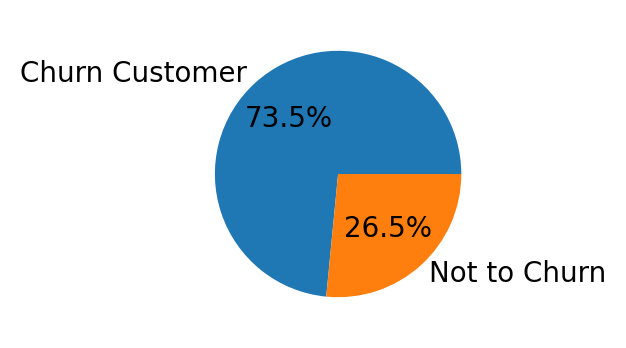

In [42]:
l = df['Churn'].value_counts()
plt.figure(figsize=(3,2),dpi=200)
_piechart=plt.pie(x=l,autopct="%.1f%%",labels=['Churn Customer','Not to Churn'])

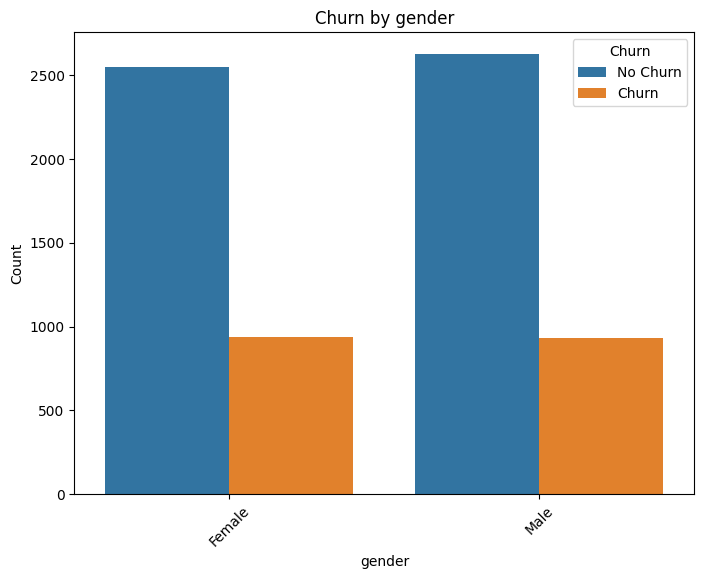

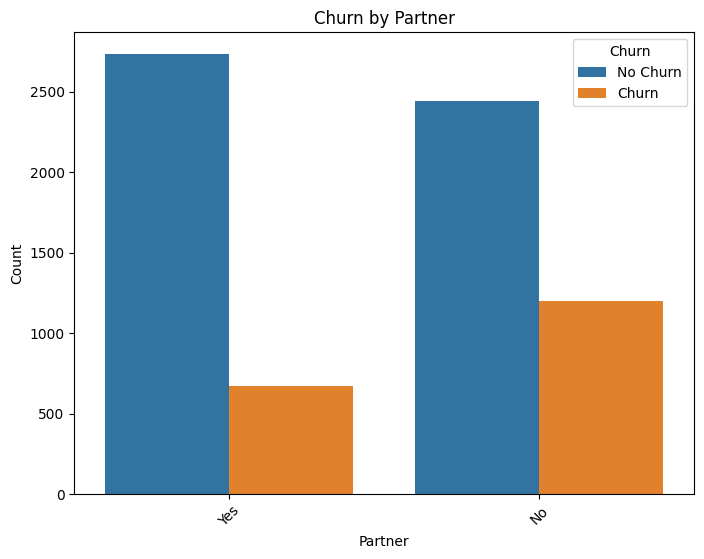

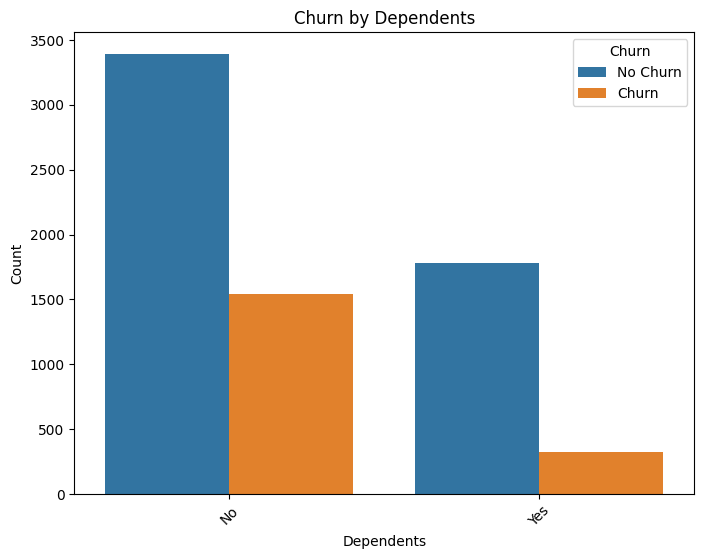

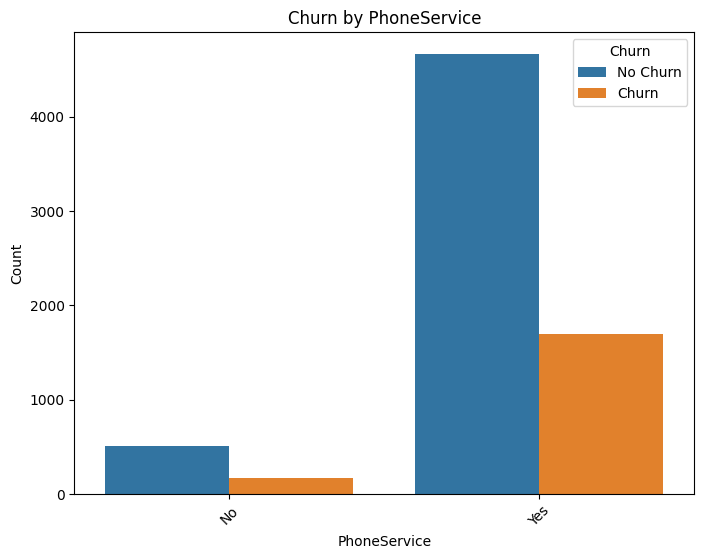

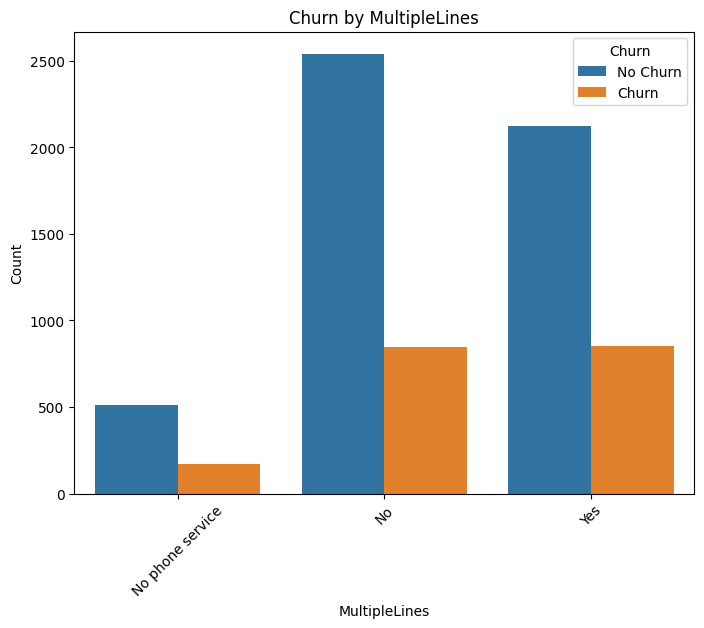

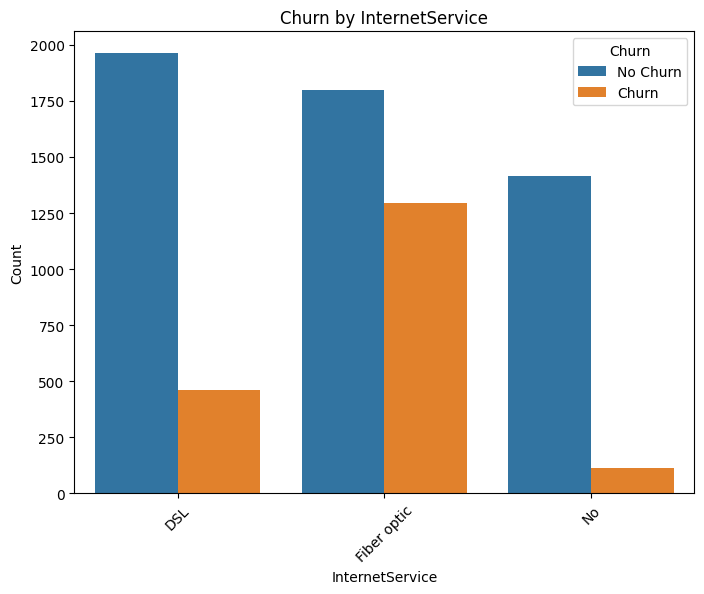

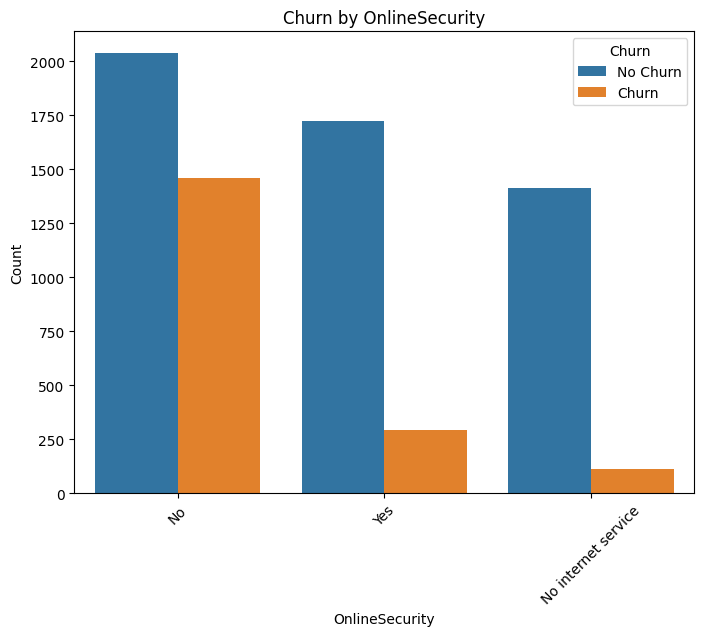

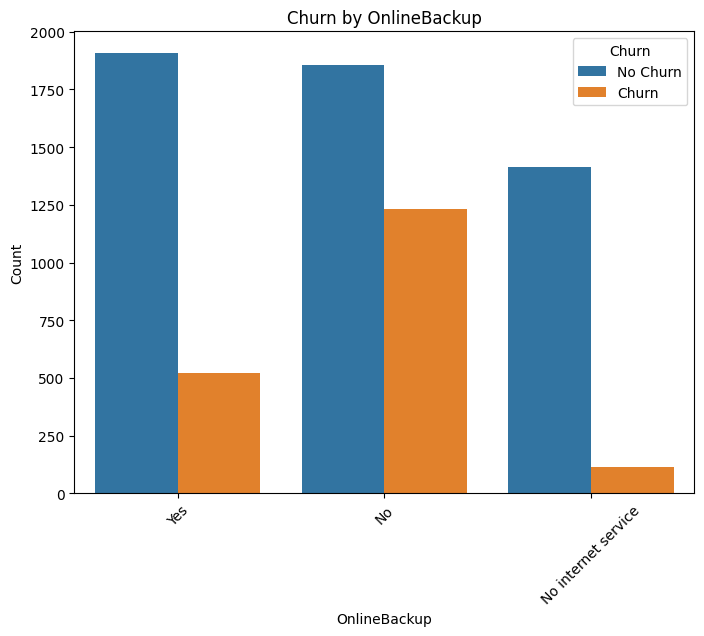

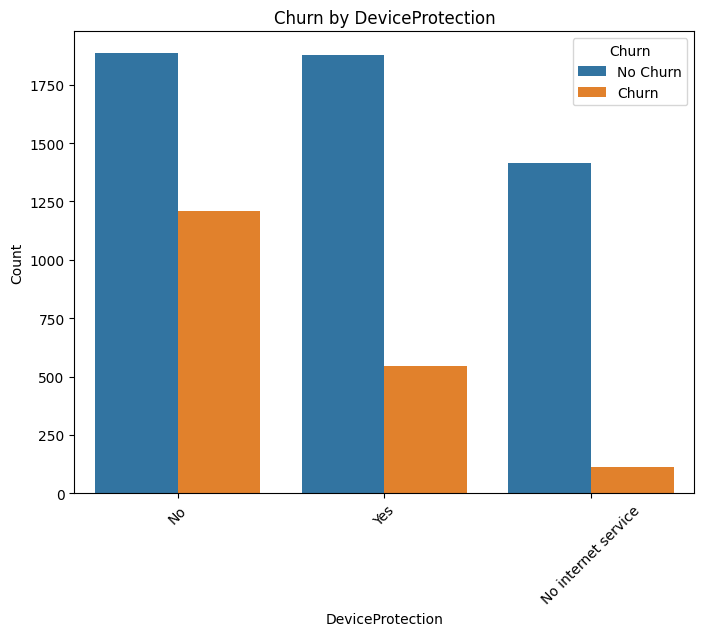

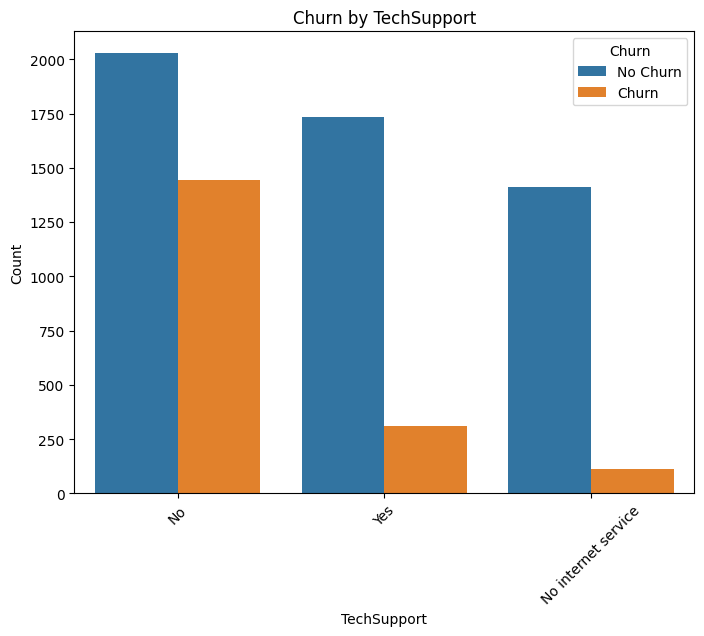

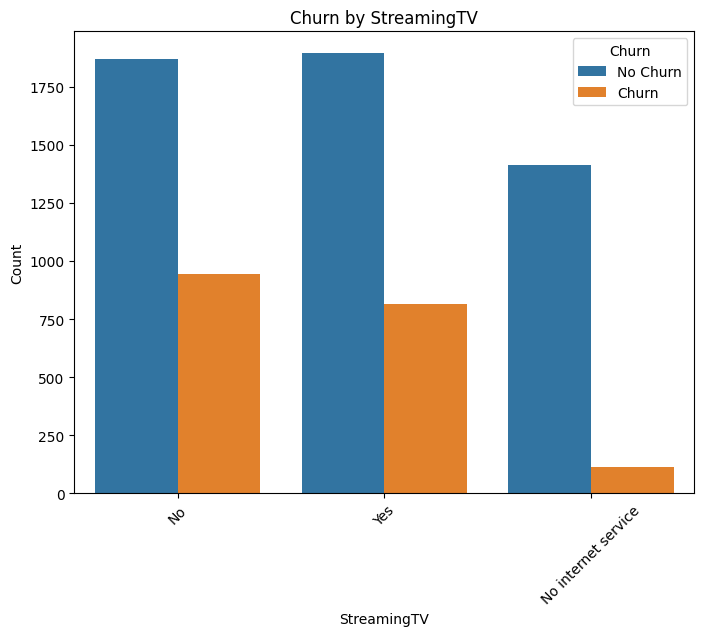

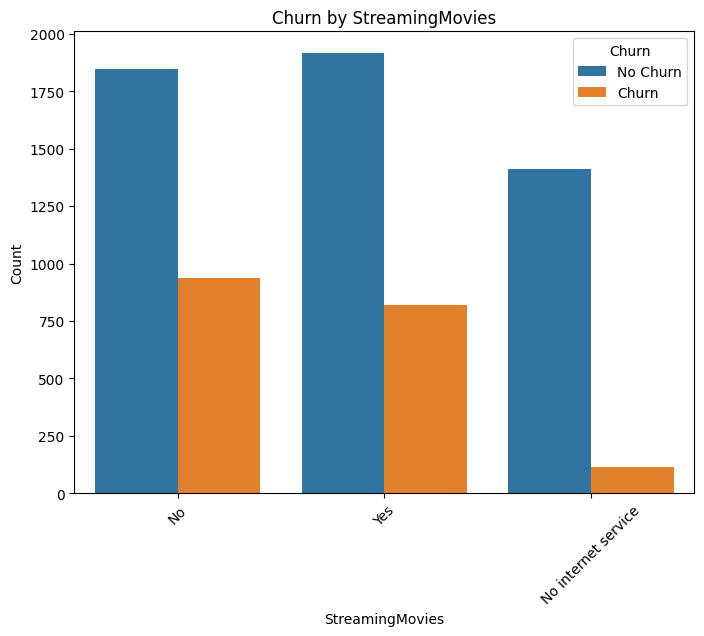

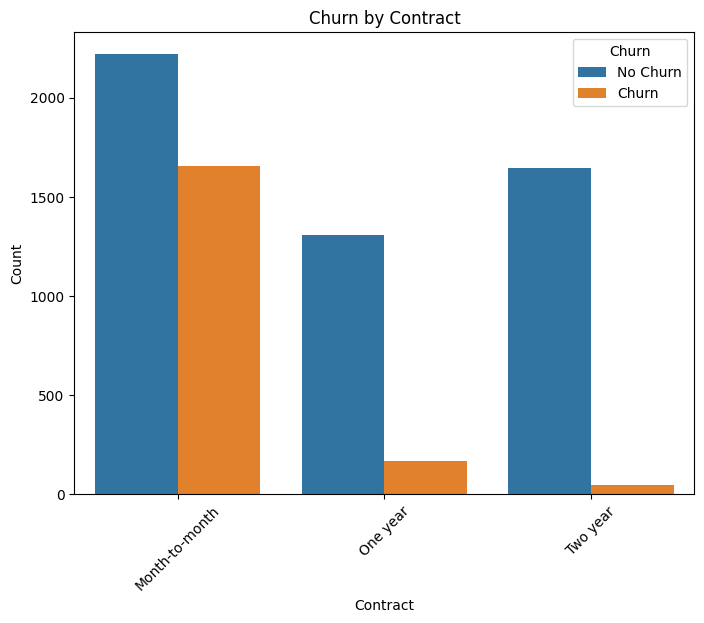

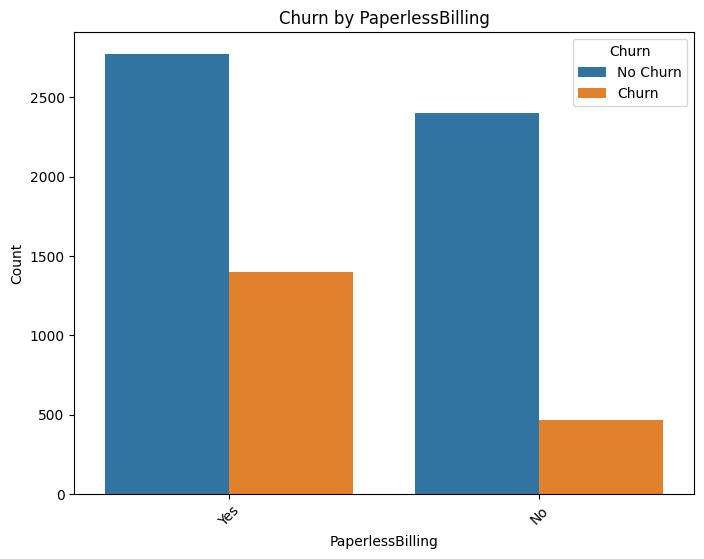

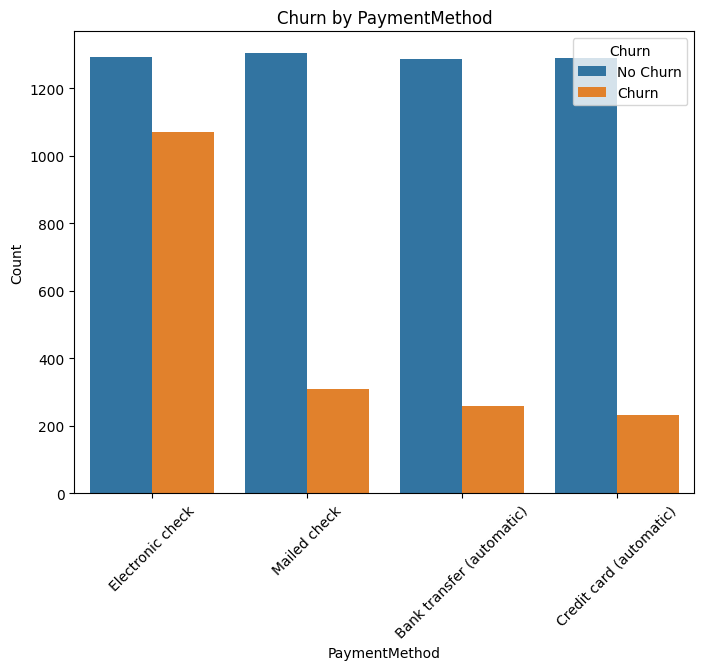

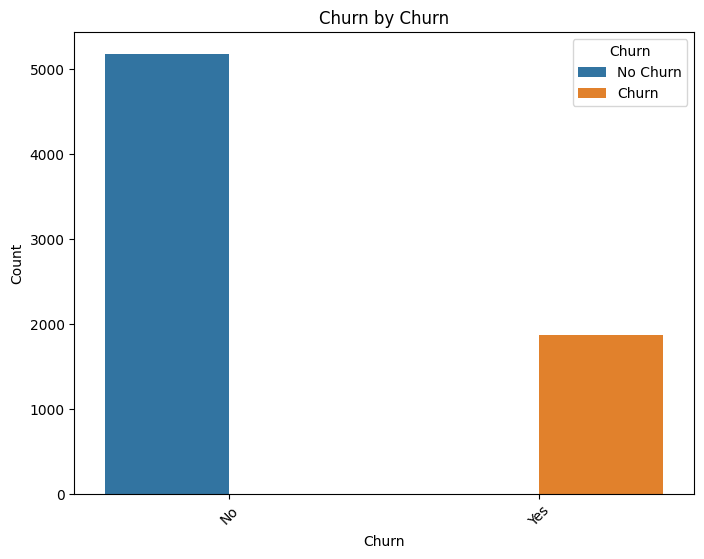

In [4]:
categorical_cols = [col for col in df.columns if df[col].nunique()<6 and df[col].dtypes in ['object','category']]

for feature in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Churn', data=df1)
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-5-84deb06f7e5e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No') ],
<ipython-input-5-84deb06f7e5e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

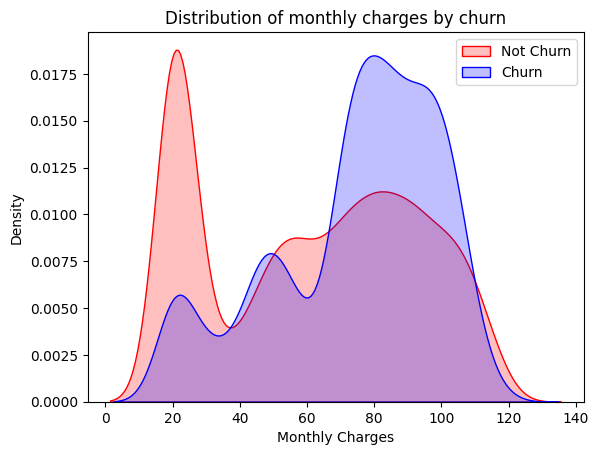

In [5]:
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [6]:
df = df.drop('customerID',axis=1)

In [7]:
le = LabelEncoder()
variable = df.select_dtypes(include='object').columns
df.update(df[variable].apply(le.fit_transform))

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [9]:
x = df.drop('Churn',axis=1)
y = df['Churn']
y = y.astype('int')

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


## Using SMOTE for imbalanced data

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(sampling_strategy='auto', random_state=1234)
x_sm, y_sm = sm.fit_resample(xtrain, ytrain)

In [44]:
print(Counter(ytrain))
print(Counter(y_sm))

Counter({0: 4162, 1: 1472})
Counter({0: 4162, 1: 4162})


In [45]:
def evaluation(model_str, y_pred, y_pred_train):
    results = {
        'model': model_str,
        'acc test' : accuracy_score(ytest, y_pred),
        'acc train': accuracy_score(ytrain, y_pred_train),
        'prec test' : precision_score(ytest, y_pred),
        'prec train' : precision_score(ytrain, y_pred_train),
        'rec test' : recall_score(ytest, y_pred),
        'rec train' : recall_score(ytrain, y_pred_train)
    }
    return results

In [46]:
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Light GBM': LGBMClassifier(),
    'XGBoost': XGBClassifier()
}

In [47]:
result_list = []
for model in model_dict:
  model_dict[model].fit(x_sm,y_sm)
  y_pred = model_dict[model].predict(xtest)
  y_pred_train = model_dict[model].predict(xtrain)
  result = evaluation(model, y_pred, y_pred_train)
  result_list.append(result)
df_eval = pd.DataFrame(result_list)
df_eval

,model,acc test,acc train,prec test,prec train,rec test,rec train
0,Logistic Regression,0.741661,0.750444,0.527919,0.514693,0.785894,0.785326
1,Decision Tree,0.732434,0.997515,0.523474,0.999315,0.561713,0.991168
2,KNN,0.679915,0.801739,0.455882,0.576476,0.702771,0.908967
3,Random Forest,0.780696,0.997515,0.608911,0.993902,0.619647,0.996603
4,AdaBoost,0.753016,0.778843,0.545966,0.557360,0.732997,0.745924
5,Gradient Boosting,0.767211,0.807064,0.572939,0.608329,0.682620,0.734375
6,Light GBM,0.764372,0.872914,0.580247,0.753351,0.591940,0.763587
7,XGBoost,0.763662,0.934860,0.576190,0.859935,0.609572,0.896739


In [54]:
def find_best_params(X, y):
    # Define the models and the parameter grids to search
    models = [{
            'name': 'LogisticRegression',
            'model': LogisticRegression(),
            'params': {
                'C': [0.1, 1, 10, 100]}},

            {'name': 'AdaBoost',
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1.0]}},

            {'name': 'GradientBoosting',
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.1, 0.01, 0.001]}}]

    best_params = {}

    # Loop over models and find the best hyperparameters for each
    for model in models:
        print(f"Finding best hyperparameters for {model['name']}...")

        # Perform a grid search with cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
        grid = GridSearchCV(model['model'], model['params'], cv=cv, n_jobs=-1, scoring='accuracy')
        grid.fit(X, y)

        # Print the best hyperparameters and the accuracy on the validation set
        print(f"Best hyperparameters: {grid.best_params_}")
        print(f"Validation accuracy: {grid.best_score_}")
        #print(f"Feature Importance:{grid.best_estimator_.feature_importances_}")
        # Store the best hyperparameters for each model in a dictionary
        best_params[model['name']] = grid.best_params_


    return best_params


In [55]:
find_best_params(xtrain,ytrain)

Finding best hyperparameters for LogisticRegression...
Best hyperparameters: {'C': 0.1}
Validation accuracy: 0.8067060572008555
Finding best hyperparameters for AdaBoost...
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Validation accuracy: 0.8054633483635172
Finding best hyperparameters for GradientBoosting...
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Validation accuracy: 0.8095454538290721


{'LogisticRegression': {'C': 0.1},
 'AdaBoost': {'learning_rate': 0.1, 'n_estimators': 100},
 'GradientBoosting': {'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100}}

In [56]:
models = ['LogisticRegression','KNN','AdaBoost','GradientBoosting']
classes = [LogisticRegression(C = 0.1),
           AdaBoostClassifier(learning_rate = 0.1,n_estimators = 100),
           GradientBoostingClassifier(learning_rate=0.1,max_depth = 3 , n_estimators=100)]

In [62]:
classes = {
    'Logistic Regression': LogisticRegression(C = 0.1),
    'AdaBoost': AdaBoostClassifier(learning_rate = 0.1,n_estimators = 200),
    'Gradient Boosting':GradientBoostingClassifier(learning_rate=0.01,max_depth = 5,n_estimators=300)
}

In [63]:
result_l = []
for model in classes:
  classes[model].fit(x_sm,y_sm)
  y_pred = classes[model].predict(xtest)
  y_pred_train = classes[model].predict(xtrain)
  result = evaluation(model, y_pred, y_pred_train)
  result_l.append(result)
df_eval = pd.DataFrame(result_l)
df_eval

,model,acc test,acc train,prec test,prec train,rec test,rec train
0,Logistic Regression,0.739532,0.750266,0.525338,0.514451,0.783375,0.786005
1,AdaBoost,0.753726,0.758786,0.544014,0.525740,0.778338,0.783967
2,Gradient Boosting,0.762243,0.807774,0.561753,0.604290,0.710327,0.765625


In [70]:
grad = GradientBoostingClassifier(learning_rate=0.01,max_depth = 5,n_estimators=300)
grad.fit(x_sm,y_sm)
ypred = grad.predict(xtest)
acc = accuracy_score(ytest,ypred)
acc

0.7622427253371186

<Axes: >

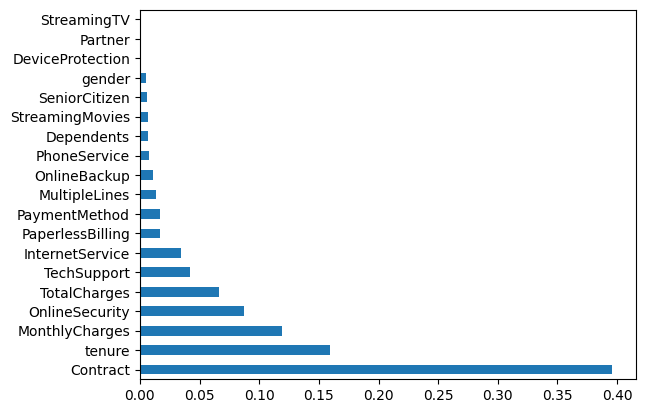

In [69]:
feat_importances = pd.Series(grad.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1012
           1       0.56      0.71      0.63       397

    accuracy                           0.76      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.76      0.77      1409



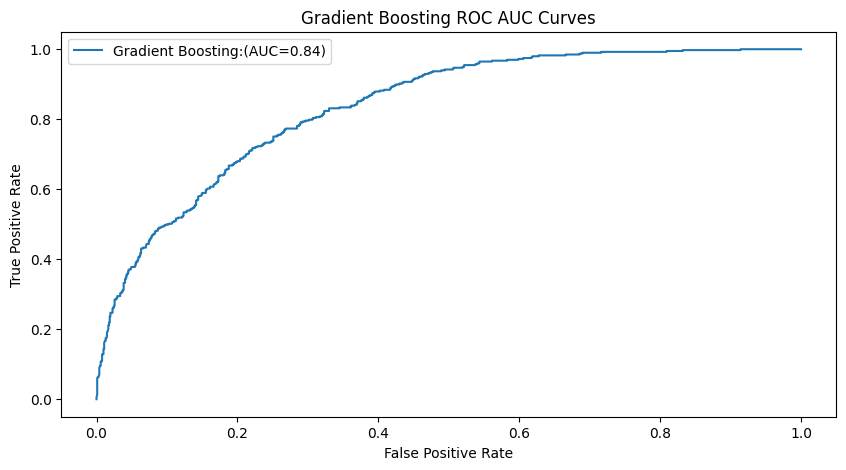

In [75]:
y_pred_proba = grad.predict_proba(xtest)[:, 1]
auc_score = roc_auc_score(ytest, y_pred_proba)

fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f'Gradient Boosting:(AUC={auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC AUC Curves')
plt.legend()
plt.show()

In [76]:
import joblib
joblib.dump(grad,'grad.joblib')

['grad.joblib']

In [87]:
new_customer_data = {
    'gender': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 50,
    'PhoneService': 15,
    'MultipleLines': 1,
    'InternetService': 0,
    'OnlineSecurity': 1,
    'OnlineBackup': 0,
    'DeviceProtection': 1,
    'TechSupport': 1,
    'StreamingTV': 0,
    'StreamingMovies': 0,
    'Contract': 0,
    'PaperlessBilling': 0,
    'PaymentMethod': 1,
    'MonthlyCharges': 70.0,
    'TotalCharges': 1000.0
}


import joblib
loaded_model = joblib.load('grad.joblib')


import numpy as np


new_customer_features = np.array([list(new_customer_data.values())])


predictions = loaded_model.predict(new_customer_features)

if predictions[0] == 0:
    print("This new customer is predicted not to churn.")
else:
    print("This new customer is predicted to churn.")


This new customer is predicted to churn.
